# "Time Series Modelling for SST by Machine Learning" - Prophet
## 9th International Conference on Computer Science and Engineering (UBMK 2024)
## Abdallah I. J. Dwikat - Computer Engineering Department - Istanbul Aydin University

## Note: Please cite the paper "Time Series Modelling for SST by Machine Learning, A.DWIKAT, Z.ASLAN" for any usage.

# Import libraries, Load data, and Convert Kelvin to Celsius

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from prophet import Prophet

from sklearn.metrics import  mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [35]:
df = pd.read_csv(r"C:\Users\hp\Research-Try-ML\Models\ANT-PAPAER\Mersin_earthdata\SST_Mersin.csv")
df["SST"] = df["SST"] - 273.15 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)
df

,SST
Date,
2004-01-01,18.336373
2004-01-02,17.548176
2004-01-03,17.247261
2004-01-04,17.504519
2004-01-05,17.448189
...,...
2023-12-27,20.831800
2023-12-28,21.115425
2023-12-29,20.515461


# Plot the dataset

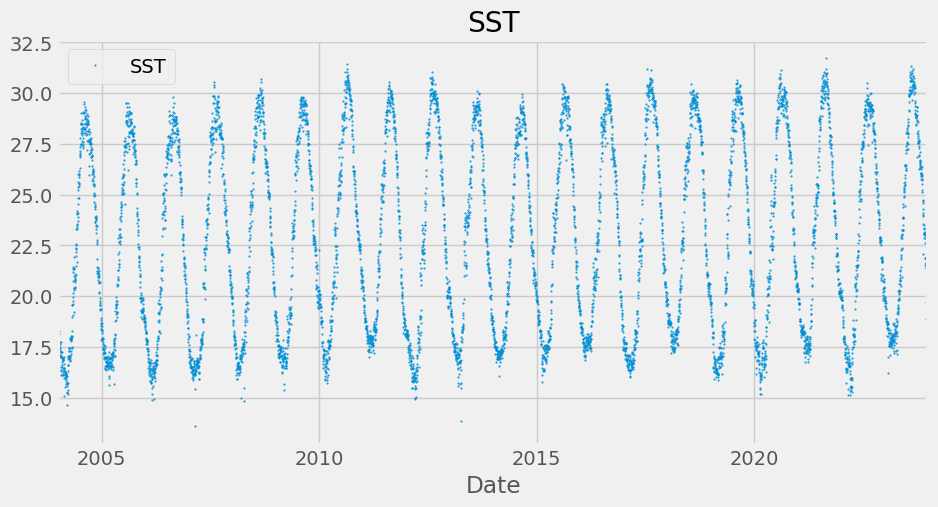

In [27]:
color_pal = sns.color_palette()
df.plot(style='.',
          figsize=(10, 5),
          ms=1,
          color=color_pal[0],
          title='SST')
plt.show()

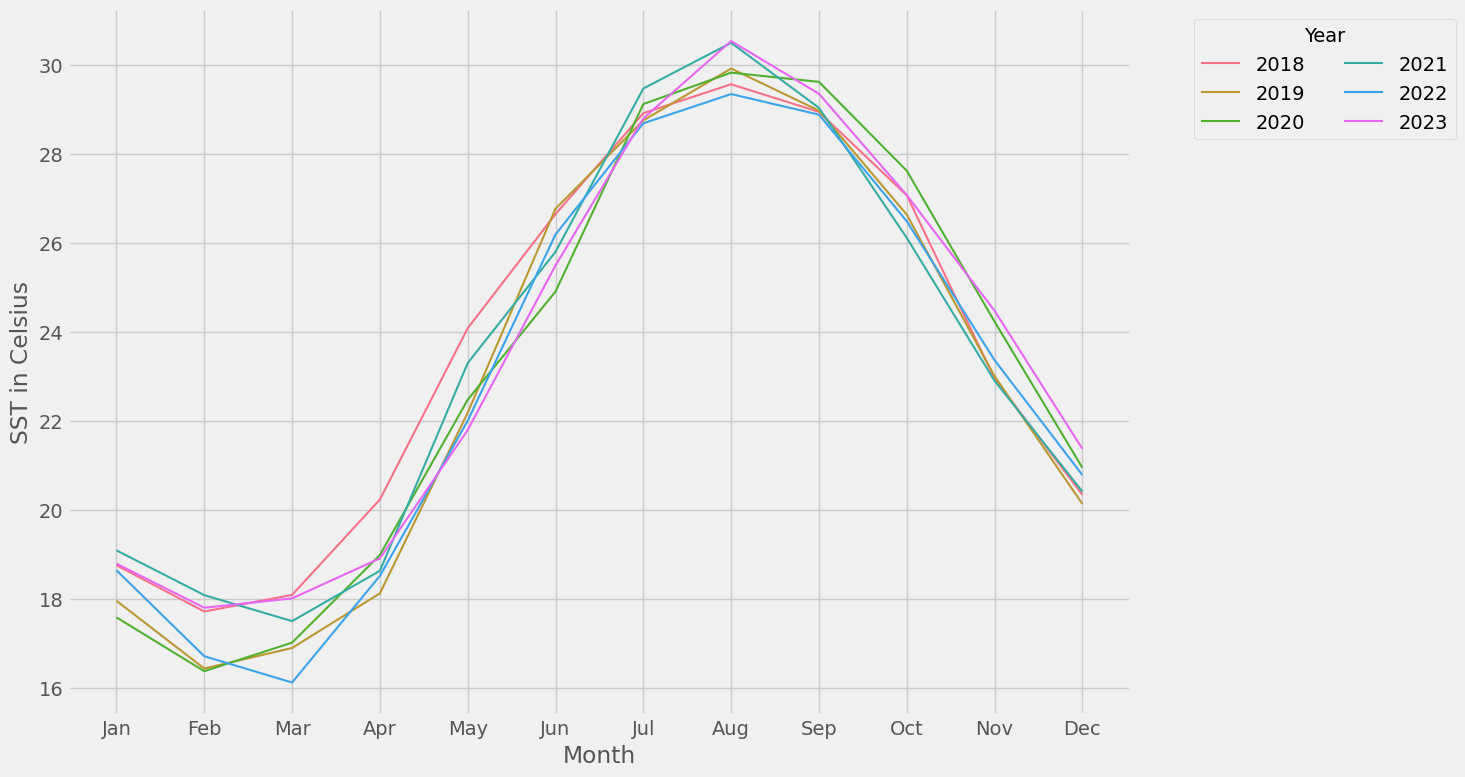

In [28]:
# Extract month and year from the index
df['Month'] = df.index.month
df['Year'] = df.index.year

# Filter the DataFrame to include only the years 2019 to 2023
df_filtered = df[(df['Year'] >= 2018) & (df['Year'] <= 2023)]

# Create a pivot table to reshape the data for plotting
pivot_table = df_filtered.pivot_table(values='SST', index='Month', columns='Year')

# Set a color palette
palette = sns.color_palette("husl", len(pivot_table.columns))

# Plot each year's data with different colors and styles
fig, ax = plt.subplots(figsize=(15, 8))

for i, year in enumerate(pivot_table.columns):
    ax.plot(pivot_table.index, pivot_table[year], label=str(year), color=palette[i], linewidth=1.5)

# Set the x-axis to display month names
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add labels and legend
plt.xlabel("Month")
plt.ylabel("SST in Celsius")
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

# Show the plot
plt.tight_layout()
plt.show()

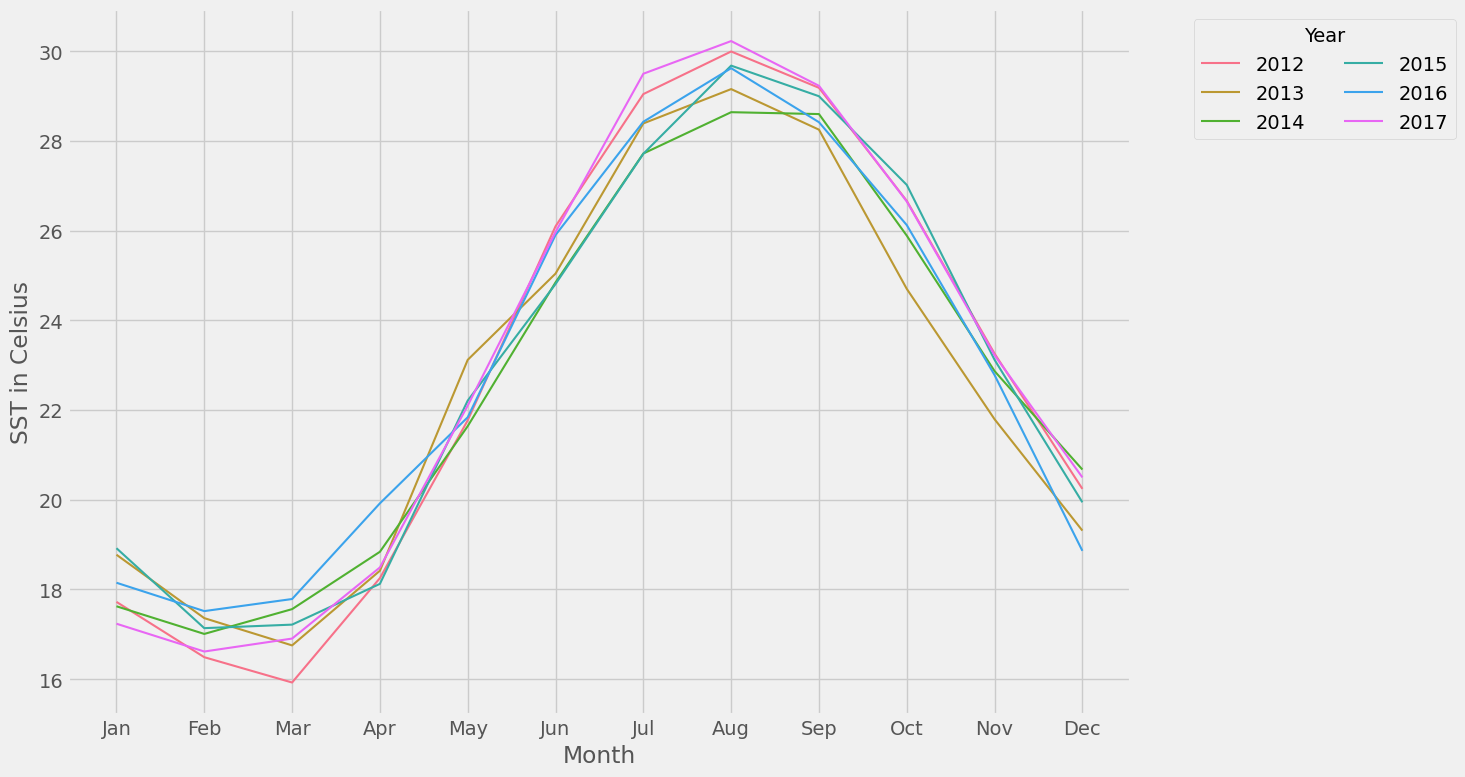

In [29]:
# Extract month and year from the index
df['Month'] = df.index.month
df['Year'] = df.index.year

# Filter the DataFrame to include only the years 2019 to 2023
df_filtered = df[(df['Year'] >= 2012) & (df['Year'] <= 2017)]

# Create a pivot table to reshape the data for plotting
pivot_table = df_filtered.pivot_table(values='SST', index='Month', columns='Year')

# Set a color palette
palette = sns.color_palette("husl", len(pivot_table.columns))

# Plot each year's data with different colors and styles
fig, ax = plt.subplots(figsize=(15, 8))

for i, year in enumerate(pivot_table.columns):
    ax.plot(pivot_table.index, pivot_table[year], label=str(year), color=palette[i], linewidth=1.5)

# Set the x-axis to display month names
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add labels and legend
plt.xlabel("Month")
plt.ylabel("SST in Celsius")
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

# Show the plot
plt.tight_layout()
plt.show()

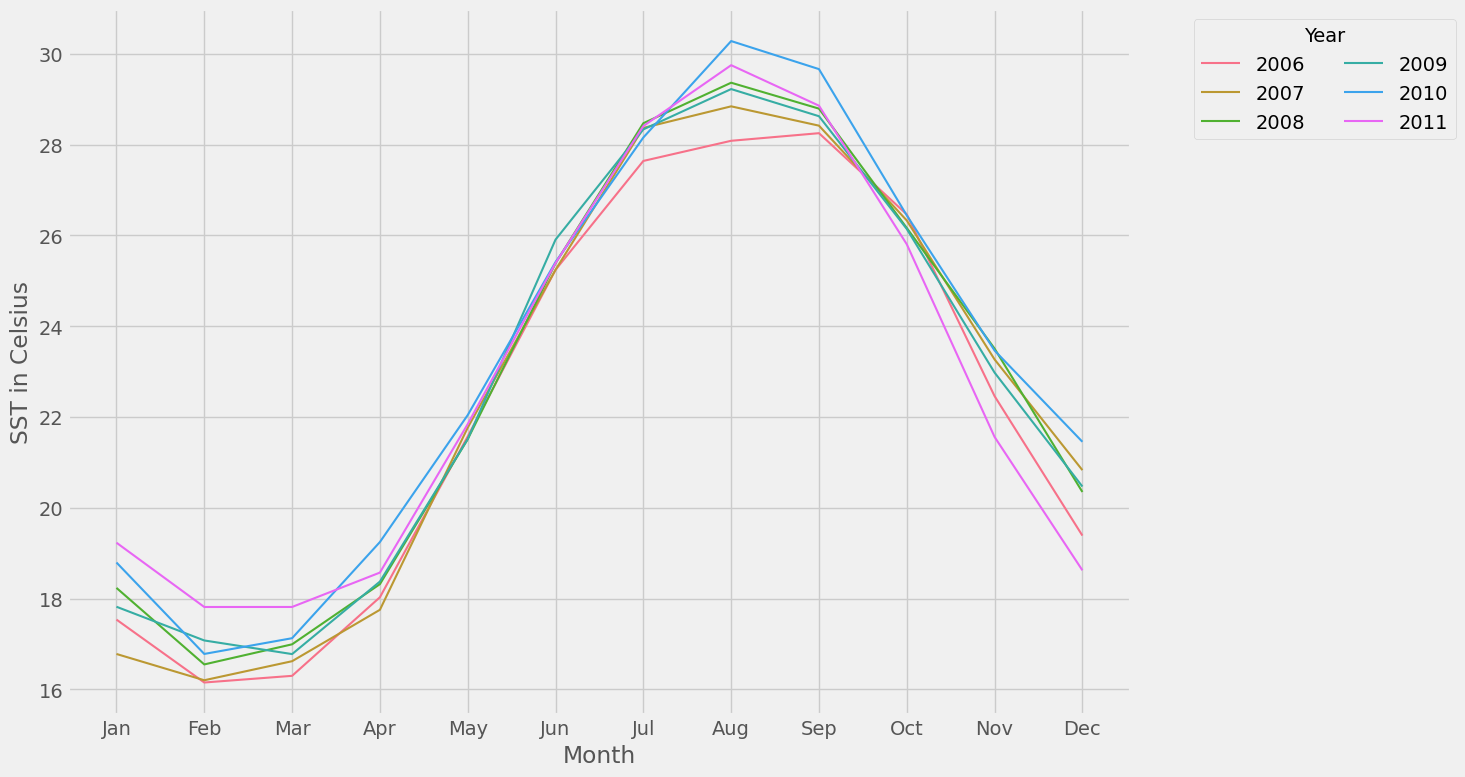

In [30]:
# Extract month and year from the index
df['Month'] = df.index.month
df['Year'] = df.index.year

# Filter the DataFrame to include only the years 2019 to 2023
df_filtered = df[(df['Year'] >= 2006) & (df['Year'] <= 2011)]

# Create a pivot table to reshape the data for plotting
pivot_table = df_filtered.pivot_table(values='SST', index='Month', columns='Year')

# Set a color palette
palette = sns.color_palette("husl", len(pivot_table.columns))

# Plot each year's data with different colors and styles
fig, ax = plt.subplots(figsize=(15, 8))

for i, year in enumerate(pivot_table.columns):
    ax.plot(pivot_table.index, pivot_table[year], label=str(year), color=palette[i], linewidth=1.5)

# Set the x-axis to display month names
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add labels and legend
plt.xlabel("Month")
plt.ylabel("SST in Celsius")
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

# Show the plot
plt.tight_layout()
plt.show()

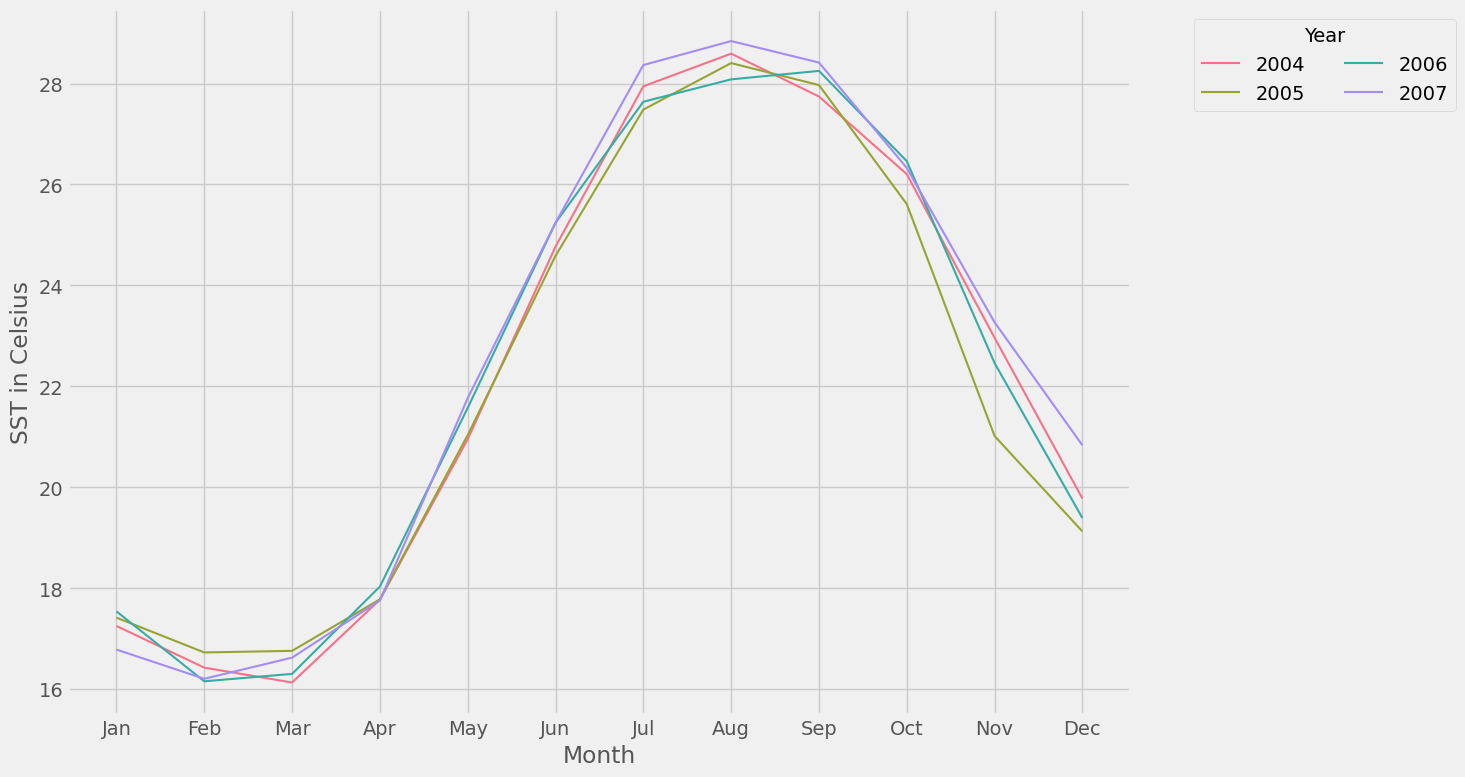

In [31]:
# Extract month and year from the index
df['Month'] = df.index.month
df['Year'] = df.index.year

# Filter the DataFrame to include only the years 2019 to 2023
df_filtered = df[(df['Year'] >= 2004) & (df['Year'] <= 2007)]

# Create a pivot table to reshape the data for plotting
pivot_table = df_filtered.pivot_table(values='SST', index='Month', columns='Year')

# Set a color palette
palette = sns.color_palette("husl", len(pivot_table.columns))

# Plot each year's data with different colors and styles
fig, ax = plt.subplots(figsize=(15, 8))

for i, year in enumerate(pivot_table.columns):
    ax.plot(pivot_table.index, pivot_table[year], label=str(year), color=palette[i], linewidth=1.5)

# Set the x-axis to display month names
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add labels and legend
plt.xlabel("Month")
plt.ylabel("SST in Celsius")
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

# Show the plot
plt.tight_layout()
plt.show()

# Additional Time Series Features

In [32]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['Monday','Tuesday',
                                        'Wednesday',
                                        'Thursday','Friday',
                                        'Saturday','Sunday'],
                            ordered=True)

def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['Date'] = df.index
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['weekday'] = df['Date'].dt.day_name()
    df['weekday'] = df['weekday'].astype(cat_type)
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear  # Fixed indentation
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.isocalendar().week  # Updated for pandas 1.1.0+
    df['date_offset'] = (df.Date.dt.month*100 + df.Date.dt.day - 320) % 1300

    df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], 
                          labels=['Spring', 'Summer', 'Fall', 'Winter'])
    
    X = df[['dayofweek','quarter','month','year',
            'dayofyear','dayofmonth','weekofyear','weekday',
            'season']]
    
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(df, label='SST')
features_and_target = pd.concat([X, y], axis=1)

In [21]:
features_and_target

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,weekday,season,SST
Date,,,,,,,,,,
2004-01-01,3,1,1,2004,1,1,1,Thursday,Winter,18.336373
2004-01-02,4,1,1,2004,2,2,1,Friday,Winter,17.548176
2004-01-03,5,1,1,2004,3,3,1,Saturday,Winter,17.247261
2004-01-04,6,1,1,2004,4,4,1,Sunday,Winter,17.504519
2004-01-05,0,1,1,2004,5,5,2,Monday,Winter,17.448189
...,...,...,...,...,...,...,...,...,...,...
2023-12-27,2,4,12,2023,361,27,52,Wednesday,Winter,20.831800
2023-12-28,3,4,12,2023,362,28,52,Thursday,Winter,21.115425
2023-12-29,4,4,12,2023,363,29,52,Friday,Winter,20.515461


## Boxplot by season of each year

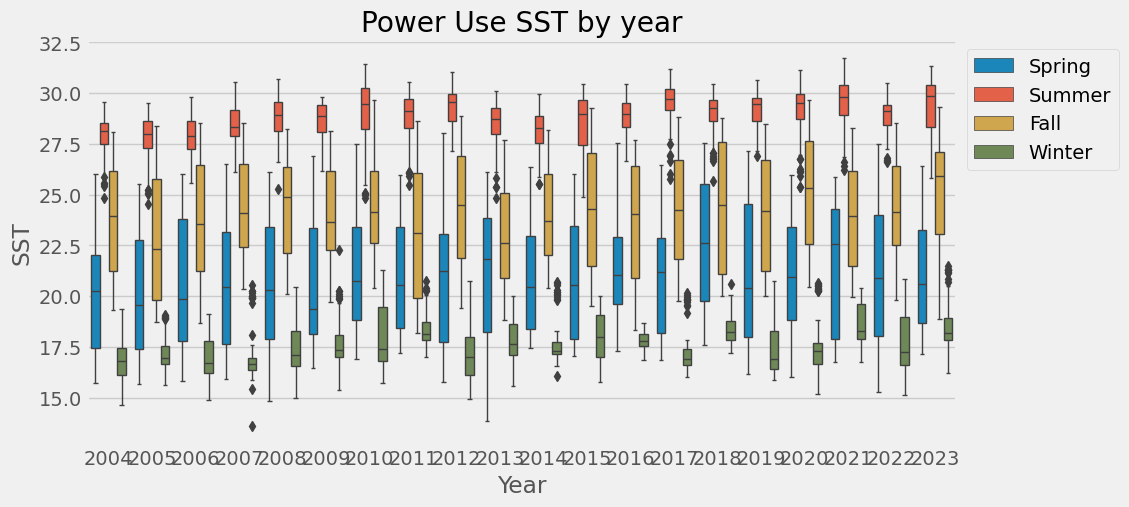

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=features_and_target.dropna(),
            x='year', #From here we an change the feature
            y='SST',
            hue='season',
            ax=ax,
            linewidth=1)
ax.set_title('Power Use SST by year')
ax.set_xlabel('Year')
ax.set_ylabel('SST')
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Train-Test Split

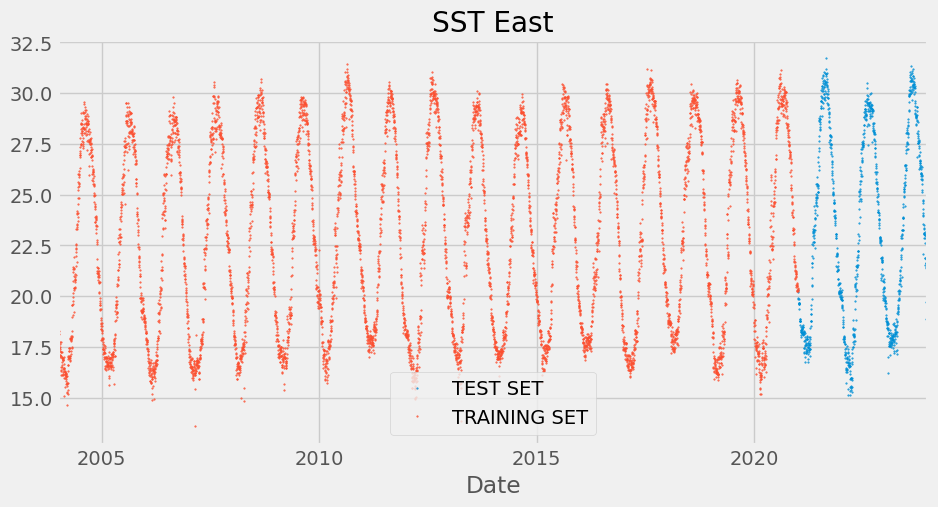

In [36]:
split_date = '01-01-2021'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

# Plot train and test so you can see where we have split
df_test \
    .rename(columns={'SST': 'TEST SET'}) \
    .join(df_train.rename(columns={'SST': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(10, 5), title='SST East', style='.', ms=1)
plt.show()

## Building the Prophet model

In [37]:
# Format data for prophet model using ds and y
df_train_prophet = df_train.reset_index() \
    .rename(columns={'Date':'ds',
                     'SST':'y'})

In [38]:
df_train_prophet.head(2)

,ds,y
0,2004-01-01,18.336373
1,2004-01-02,17.548176


In [39]:
%%time
model = Prophet()
model.fit(df_train_prophet)

10:32:55 - cmdstanpy - INFO - Chain [1] start processing
10:32:59 - cmdstanpy - INFO - Chain [1] done processing


CPU times: total: 625 ms
Wall time: 5.98 s


# Forecast on the test set

In [40]:
df_test_prophet = df_test.reset_index() \
    .rename(columns={'Date':'ds',
                     'SST':'y'})

df_test_fcst = model.predict(df_test_prophet)

In [41]:
df_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-02,23.170314,18.247340,20.120821,23.170314,23.170314,-3.975848,-3.975848,-3.975848,-0.008898,-0.008898,-0.008898,-3.966950,-3.966950,-3.966950,0.0,0.0,0.0,19.194466
1,2021-01-03,23.170104,18.278139,20.105618,23.170104,23.170104,-4.031398,-4.031398,-4.031398,0.004097,0.004097,0.004097,-4.035495,-4.035495,-4.035495,0.0,0.0,0.0,19.138706
2,2021-01-04,23.169894,18.173259,20.005977,23.169894,23.169894,-4.082706,-4.082706,-4.082706,0.020978,0.020978,0.020978,-4.103684,-4.103684,-4.103684,0.0,0.0,0.0,19.087189
3,2021-01-05,23.169685,18.125317,19.938363,23.169685,23.169685,-4.174648,-4.174648,-4.174648,-0.003296,-0.003296,-0.003296,-4.171352,-4.171352,-4.171352,0.0,0.0,0.0,18.995036
4,2021-01-06,23.169475,18.097752,19.824830,23.169475,23.169475,-4.237619,-4.237619,-4.237619,0.000724,0.000724,0.000724,-4.238342,-4.238342,-4.238342,0.0,0.0,0.0,18.931857


### Note: we can see more than only y as this is an additive model so it shows each component of the prediction in our output

# Communication Results (blue is predicted values)

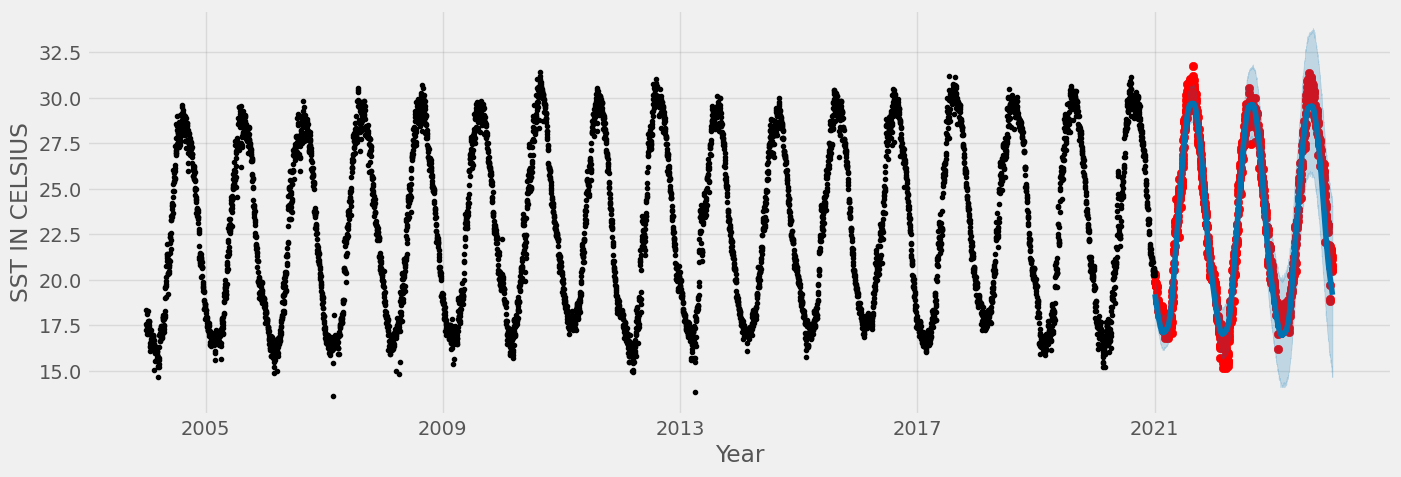

In [42]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(df_test.index, df_test['SST'], color='r')
fig = model.plot(df_test_fcst, ax=ax)
plt.xlabel("Year")
plt.ylabel("SST IN CELSIUS");

### Plot Components

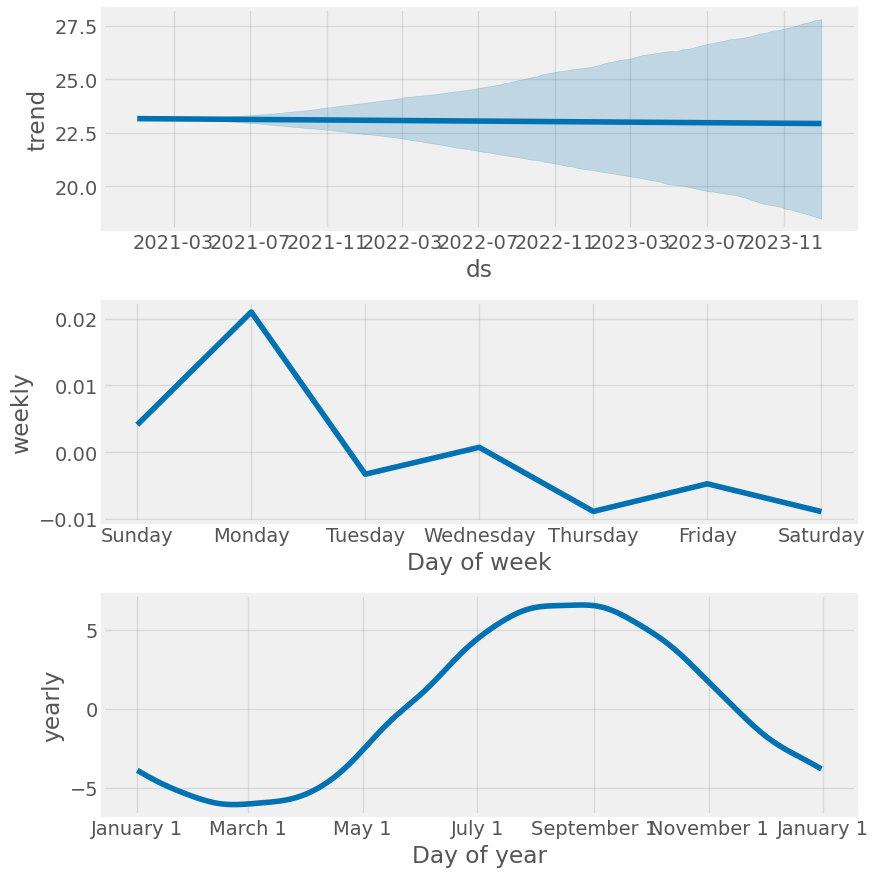

In [43]:
fig = model.plot_components(df_test_fcst)
plt.show()

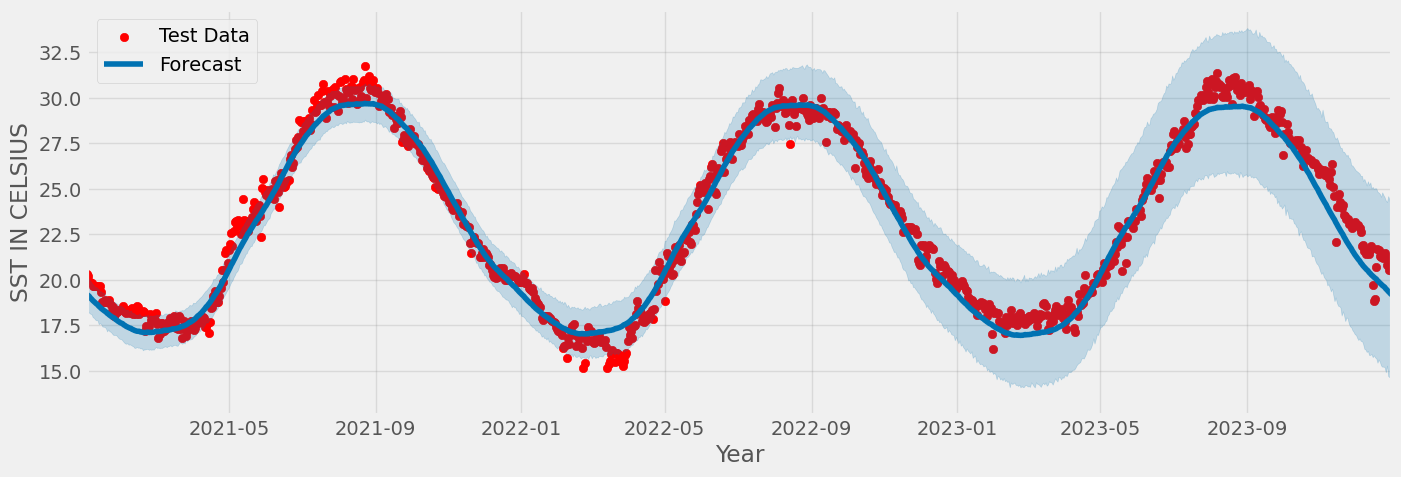

In [44]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(15, 5))
7
# Plot the test data
ax.scatter(df_test.index, df_test['SST'], color='r', label='Test Data')

# Plot the forecasted data
fig = model.plot(df_test_fcst, ax=ax)

# Remove the training data from the plot
ax.get_lines()[0].remove()

# Set the x-axis limits to match the test data range
ax.set_xlim(df_test.index.min(), df_test.index.max())

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("SST IN CELSIUS")
plt.legend(['Test Data', 'Forecast'])

plt.show()

NameError: name 'datetime' is not defined

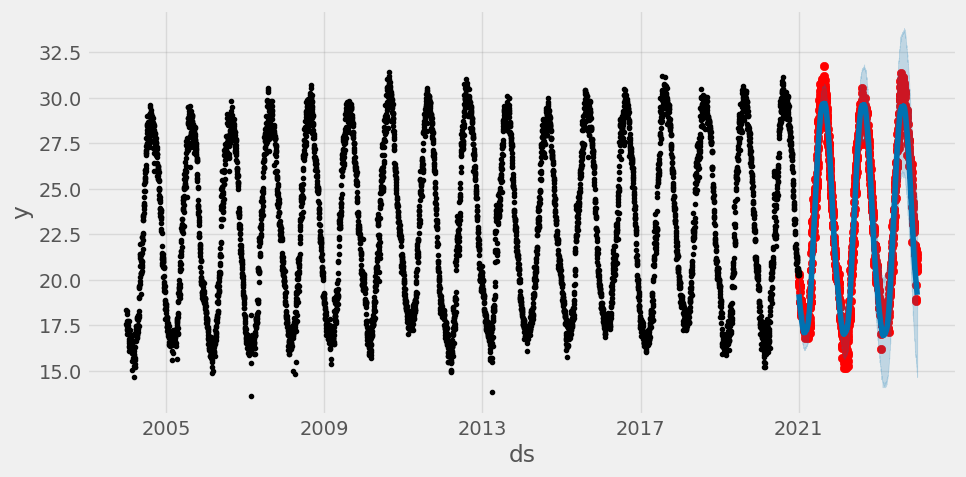

In [45]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_test.index, df_test['SST'], color='r')
fig = model.plot(df_test_fcst, ax=ax)

# Convert string dates to datetime objects
lower_date = datetime.strptime('01-01-2021', '%d-%m-%Y')
upper_date = datetime.strptime('31-01-2021', '%d-%m-%Y')

# Correct usage of set_xlim
ax.set_xlim(lower_date, upper_date)
ax.set_ylim(10, 25)
plt.suptitle('January 2021 Forecast vs Actuals')
plt.ylabel("SST IN CELSIUS")
plt.xlabel("JANUARY 2021")

plt.show()

NameError: name 'datetime' is not defined

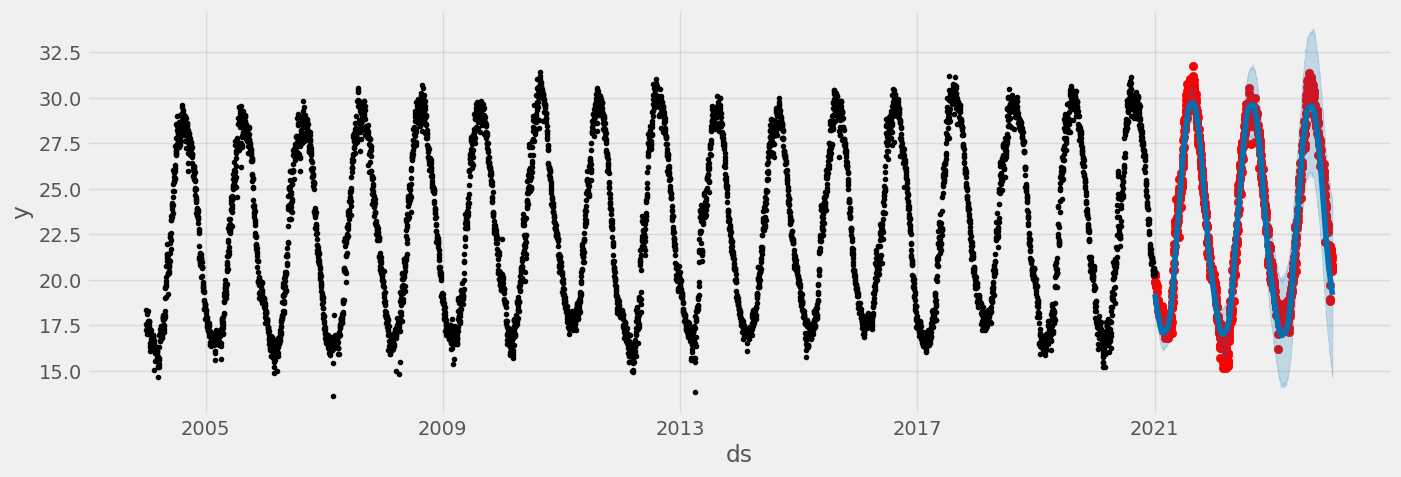

In [46]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(df_test.index, df_test['SST'], color='r')
fig = model.plot(df_test_fcst, ax=ax)

# Convert string dates to datetime objects
lower_date = datetime.strptime('01-01-2021', '%d-%m-%Y')
upper_date = datetime.strptime('08-01-2021', '%d-%m-%Y')

ax.set_xbound(lower_date, upper_date)
ax.set_ylim(15, 25)
ax.set_title('First Week of January Forecast vs Actuals')
plt.xlabel("Date")
plt.ylabel("SST IN CELSIUS")
plt.show()

# Evaluation Metrics on Test set (2021-2023)

### MSE

In [47]:
np.sqrt(mean_squared_error(y_true=df_test['SST'],
                   y_pred=df_test_fcst['yhat']))

0.7935353818930058

### MAE

In [48]:
mean_absolute_error(y_true=df_test['SST'],
                   y_pred=df_test_fcst['yhat'])

0.6366759926751763

### MAPE

In [49]:
mean_absolute_percentage_error(y_true=df_test['SST'],
                   y_pred=df_test_fcst['yhat'])

2.8656410323706627

### R SQUARE

In [50]:
from sklearn.metrics import r2_score

# Assuming df_test['SST'] is your true values and df_test_fcst['yhat'] is your predicted values
y_true = df_test['SST']
y_pred = df_test_fcst['yhat']

# Calculate R-squared
r_squared = r2_score(y_true, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.9708443506554941


# Forecast future until the end of 2026

In [51]:
# Create future dates for prediction
future = model.make_future_dataframe(periods=365*6, freq='D', include_history=False)

# Make predictions
forecast = model.predict(future)

In [52]:
print(forecast[['ds','yhat']].to_string())

             ds       yhat
0    2021-01-02  19.194466
1    2021-01-03  19.138706
2    2021-01-04  19.087189
3    2021-01-05  18.995036
4    2021-01-06  18.931857
5    2021-01-07  18.855891
6    2021-01-08  18.794608
7    2021-01-09  18.726107
8    2021-01-10  18.675931
9    2021-01-11  18.630884
10   2021-01-12  18.545975
11   2021-01-13  18.490682
12   2021-01-14  18.423105
13   2021-01-15  18.370564
14   2021-01-16  18.311010
15   2021-01-17  18.269840
16   2021-01-18  18.233724
17   2021-01-19  18.157547
18   2021-01-20  18.110680
19   2021-01-21  18.051139
20   2021-01-22  18.006181
21   2021-01-23  17.953720
22   2021-01-24  17.919143
23   2021-01-25  17.889136
24   2021-01-26  17.818624
25   2021-01-27  17.777045
26   2021-01-28  17.722501
27   2021-01-29  17.682358
28   2021-01-30  17.634650
29   2021-01-31  17.604897
30   2021-02-01  17.579925
31   2021-02-02  17.514801
32   2021-02-03  17.479100
33   2021-02-04  17.431056
34   2021-02-05  17.398152
35   2021-02-06  17.358525
3

### SST Forecasts between 2021-2024  in Mersin by Prophet Model

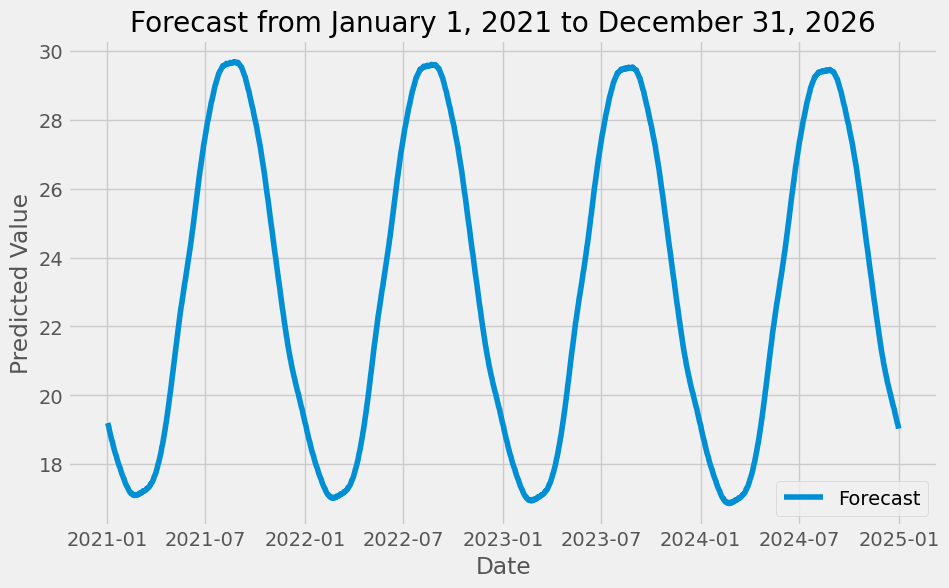

In [53]:
forecast_filtered = forecast[(forecast['ds'] >= '2021-01-01') & (forecast['ds'] <= '2024-12-31')]

# Plot the filtered forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast_filtered['ds'], forecast_filtered['yhat'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.title('Forecast from January 1, 2021 to December 31, 2026')
plt.legend()
plt.grid(True)
plt.show()

# Full work Results plot

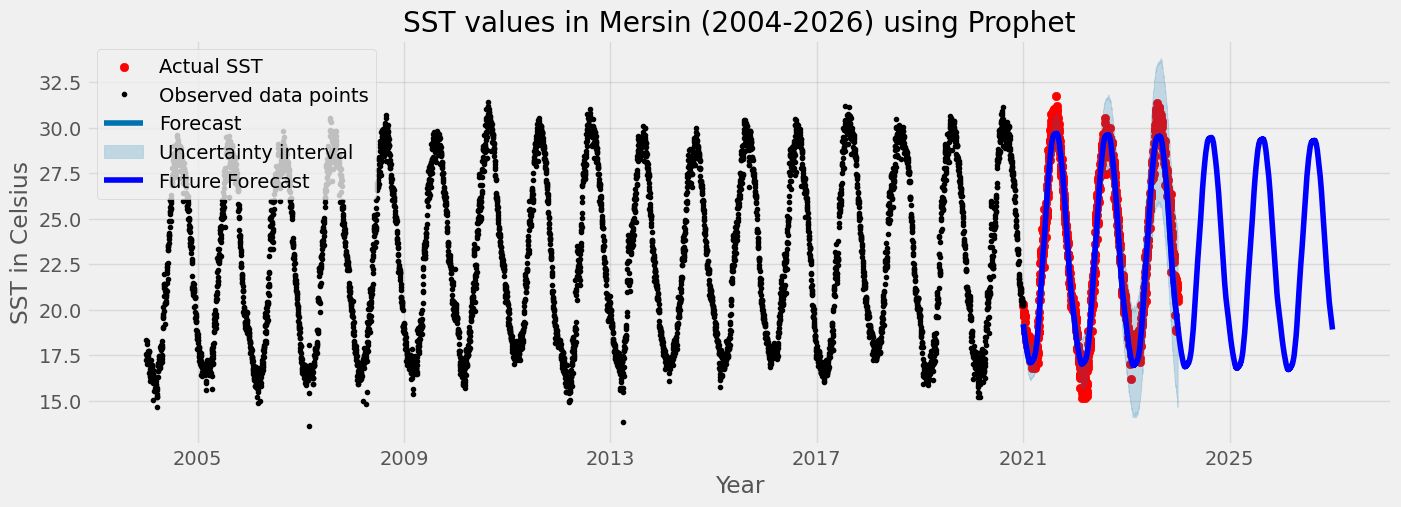

In [54]:
# Filter the forecast DataFrame for the desired date range
forecast_filtered = forecast[(forecast['ds'] >= '2021-01-01') & (forecast['ds'] <= '2026-12-31')]

# Create the plot
f, ax = plt.subplots(figsize=(15, 5))

# Plot the actual values
ax.scatter(df_test.index, df_test['SST'], color='r', label='Actual SST')

# Plot the forecasted values
model.plot(df_test_fcst, ax=ax)

# Plot the future predictions
ax.plot(forecast_filtered['ds'], forecast_filtered['yhat'], label='Future Forecast', color='b')

# Customize the plot
plt.xlabel("Year")
plt.ylabel("SST in Celsius")
plt.title("SST values in Mersin (2004-2026) using Prophet")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

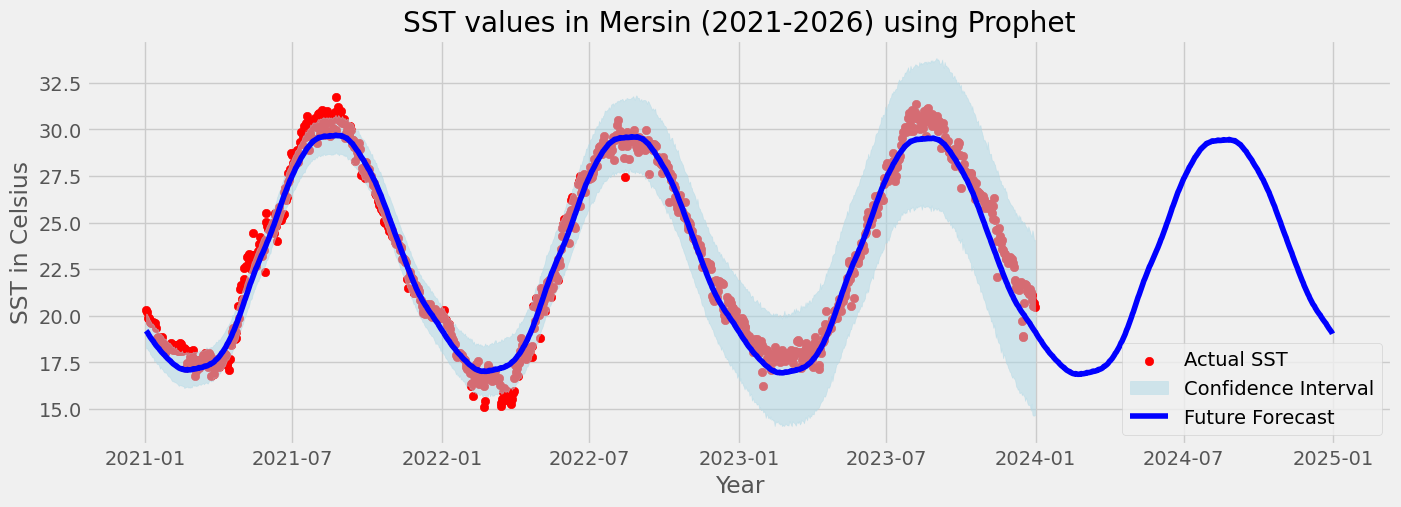

In [55]:
# Filter the forecast DataFrame for the desired date range
forecast_filtered = forecast[(forecast['ds'] >= '2021-01-01') & (forecast['ds'] <= '2024-12-31')]

# Filter the test DataFrame to exclude training data
df_test_filtered = df_test[df_test.index >= '2021-01-01']

# Filter the forecasted values to exclude training data
df_test_fcst_filtered = df_test_fcst[df_test_fcst['ds'] >= '2021-01-01']

# Create the plot
f, ax = plt.subplots(figsize=(15, 5))

# Plot the actual values
ax.scatter(df_test_filtered.index, df_test_filtered['SST'], color='r', label='Actual SST')

# # Plot the forecasted values
# ax.plot(df_test_fcst_filtered['ds'], df_test_fcst_filtered['yhat'], label='Test Predictions', color='orange')

# Add the confidence interval
ax.fill_between(df_test_fcst_filtered['ds'], df_test_fcst_filtered['yhat_lower'], df_test_fcst_filtered['yhat_upper'], color='lightblue', alpha=0.5, label='Confidence Interval')

# Plot the future predictions
ax.plot(forecast_filtered['ds'], forecast_filtered['yhat'], label='Future Forecast', color='b')

# Customize the plot
plt.xlabel("Year")
plt.ylabel("SST in Celsius")
plt.title("SST values in Mersin (2021-2026) using Prophet")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Save the results

In [90]:
print(df_train_prophet.columns)
print(forecast_filtered.columns)


Index(['ds', 'yhat'], dtype='object')
Index(['ds', 'yhat'], dtype='object')


In [97]:
# Extract the required columns from the forecast DataFrame and filter the dates
forecast_filtered = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2026-12-31')][['ds', 'yhat']]

# Set 'ds' as the index for forecast_filtered
forecast_filtered.set_index('ds', inplace=True)

# Merge df with forecast_filtered on the index
merged_df = df.merge(forecast_filtered, left_index=True, right_index=True, how='outer')
merged_df.drop(columns=["Month", "Year"], inplace=True)
merged_df

,SST,yhat
2004-01-01,18.336373,NaN
2004-01-02,17.548176,NaN
2004-01-03,17.247261,NaN
2004-01-04,17.504519,NaN
2004-01-05,17.448189,NaN
...,...,...
2026-12-27,NaN,19.192667
2026-12-28,NaN,19.142221
2026-12-29,NaN,19.050055
2026-12-30,NaN,18.985715


In [99]:
merged_df.to_csv(r"C:Prophet-Mersin.csv", index=True)

# Values above 29 over years

AttributeError: module 'pandas.plotting' has no attribute 'DateFormatter'

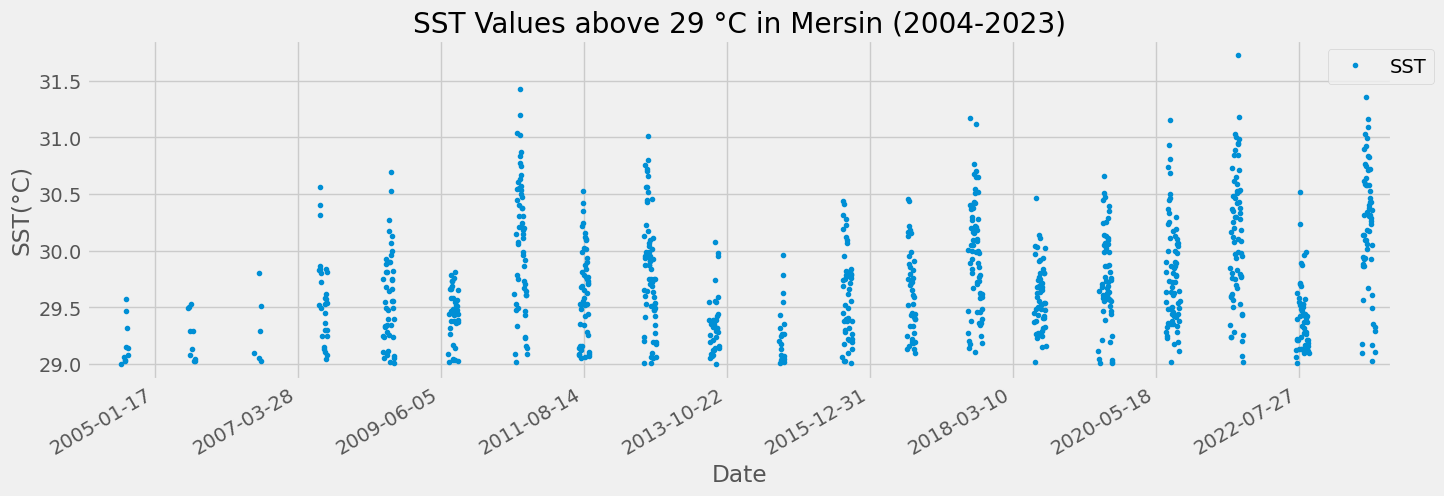

In [79]:
# Filter the data
filtered_sst = df[df["SST"] > 29]["SST"]

# Plot the filtered SST(°C) data
fig, ax = plt.subplots(figsize=(15, 5))
filtered_sst.plot(ax=ax, style='.')
plt.title('SST Values above 29 °C in Mersin (2004-2023)')
plt.xlabel('Date')
plt.ylabel('SST(°C)')
plt.legend(['SST'], bbox_to_anchor=(1.04, 1))

# Set the x-axis limits
ax.set_xlim(pd.Timestamp('2004-01-01'), pd.Timestamp('2023-12-31'))

# Format the x-axis to show the correct dates
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(pd.plotting.DateFormatter('%Y-%m'))

plt.show()

# Output: 
### The Accuray of the Prophet model on SST time Series daily data is more than 97%
#### However we noted that whenever the preditions are wider, the reliability in predicting is lower
#### It is reliable with this model to predcit first couple of months in the next year or a full year if we apply full data of its previous year 

# "Time Series Modelling for SST by Machine Learning"
# Abdallah I. J. Dwikat - Computer Engineering - Istanbul Aydin University
## Email: adweikat12@gmail.com 
## Linkedin: Abdallah Dwikat  www.linkedin.com/in/
abdallah-dwikat-04095927

## Note: Please cite the paper "Time Series Modelling for SST by Machine Learning, A.DWIKAT, Z.ASLAN" for any usage.